# Pré-processamento de dados 
# Análise de Sobrevivência no Titanic

Equipe:
Mayk gabriel, 
Davi Medeiro,
José Merino,
Matheus Merino.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (8,5)

df = pd.read_csv(r"C:\Users\mayk3\OneDrive\Documentos\Trabalho titanic pre-processamneto\archive (7)\Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# Substituir idade pela mediana, agrupando por classe e sexo
df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('median'), inplace=True)

# Substituir porto de embarque pelo mais comum
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# A coluna 'Cabin' tem muitos nulos — pode ser descartada
df.drop(columns=['Cabin'], inplace=True)


C:\Users\mayk3\AppData\Local\Temp\ipykernel_19312\3943028908.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('median'), inplace=True)
C:\Users\mayk3\AppData\Local\Temp\ipykernel_19312\3943028908.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [4]:
# Tamanho da família
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Viajando sozinho
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Extrair título do nome
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [5]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [6]:
df.isnull().sum()
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,1,Mr


C:\Users\mayk3\AppData\Local\Temp\ipykernel_19312\4275033584.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='pastel')


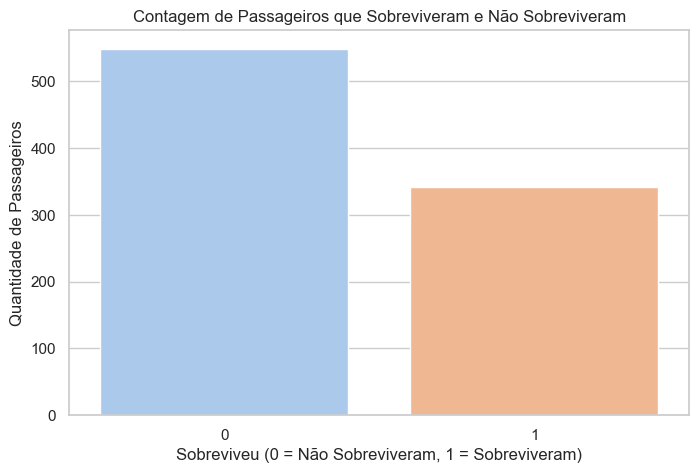

In [8]:
sns.countplot(x='Survived', data=df, palette='pastel')
plt.title('Contagem de Passageiros que Sobreviveram e Não Sobreviveram')
plt.xlabel('Sobreviveu (0 = Não Sobreviveram, 1 = Sobreviveram)')
plt.ylabel('Quantidade de Passageiros')
plt.show()

# Referências 

https://www.kaggle.com/datasets/yasserh/titanic-dataset?resource=download